In [1]:
#I connected drive to read rar file properly
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!unzip "/content/drive/MyDrive/data.zip" -d "/content/drive/MyDrive/"

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

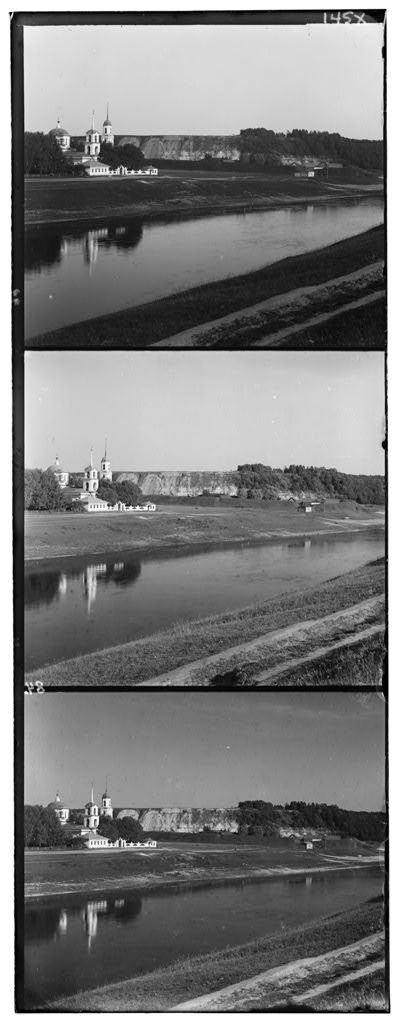

In [4]:
path="/content/drive/MyDrive/data/00125v.jpg"
from google.colab.patches import cv2_imshow
img=cv2.imread(path,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


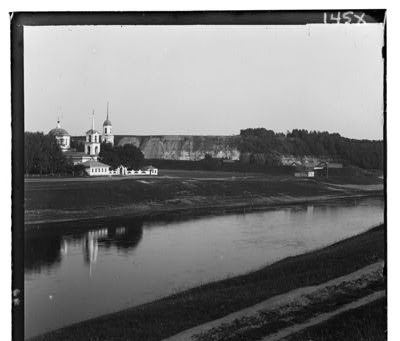

In [5]:
h=np.floor(img.shape[0]/3.0).astype(np.int)
imgb=img[0:h,:]
imgg=img[h:2*h,:]
imgr=img[2*h:3*h,:]
cv2_imshow(imgb)

In [6]:
import sys
def roll_image(img,x,y):
  rollx=np.roll(img,x,axis=1)
  return np.roll(rollx,y,axis=0)

In [7]:
def align(img1,img2,sp,s):
  sx,sy=sp[0],sp[1]
  error=sys.maxsize
  offset=sp
  for i in range(sx-s,sx+s+1):
    for j in range(sy-s,sy+s+1):
      curr=np.sum((roll_image(img1,i,j)-img2)**2)
      if curr<error:
        error=curr
        offset=[i,j]
  return offset

In [8]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
def piramid(img1,img2,scale):
  if img1.shape[0]<256:
    return align(img1,img2,[0,0],15)
  else:
    img11=downscale_local_mean(img1,(2,2))
    img22=downscale_local_mean(img2,(2,2))
    newoffset=np.multiply(piramid(img11,img22,scale-1),2)
    search=int(15/scale)
    return align(img1,img2,newoffset,search)

In [9]:
res1=piramid(imgg,imgb,15)
res2=piramid(imgr,imgb,15)
print(res1)
print(res2)

[-1, 7]
[-3, 9]


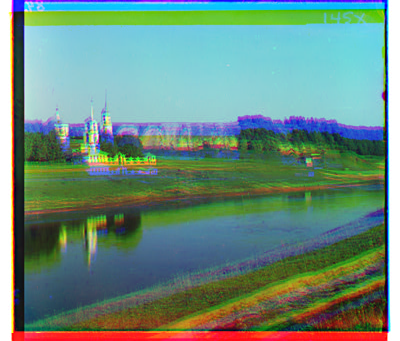

(341, 400)
(341, 400)
(341, 400)


In [10]:
imgg=roll_image(imgg,0,-8)
imgr=roll_image(imgr,0,0)
res=np.dstack([imgb,imgg,imgr])
cv2_imshow(res)
print(imgg.shape)
print(imgr.shape)
print(imgb.shape)
#res=np.dstack([imgb,imgg,imgr])
#cv2_imshow(res)

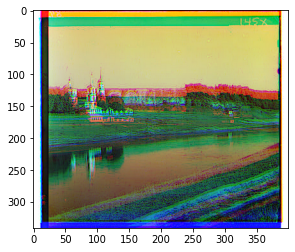

In [11]:
#Laplacian filtering
kernel=np.array([[0,1,0],
                [1,-4,1],
                [0,1,0]])
li=cv2.filter2D(src=res,ddepth=-1,kernel=kernel)
c=-1
g=res+c*li
gclip=np.clip(g,0,255)
plt.imshow(gclip)

In [12]:
#gamma correction
def gamma_cor(img,gamma=0.5):
  g=1.0/gamma
  table=np.array([((i/255)**g)*255 for i in np.arange(0,256)])
  lut_img=cv2.LUT(img.astype(np.uint8),table.astype(np.uint8))
  return lut_img

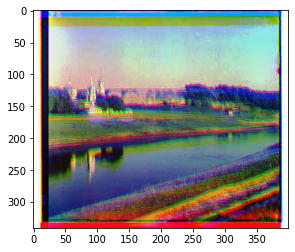

In [13]:
#histogram equalization
img=cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
R,G,B=cv2.split(img)
R1=cv2.equalizeHist(R)
G1=cv2.equalizeHist(G)
B1=cv2.equalizeHist(B)
histogram_out=cv2.merge((R1,G1,B1))
plt.imshow(histogram_out)

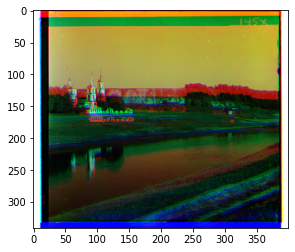

In [14]:
r=gamma_cor(res)
plt.imshow(r)

In [15]:
def tümislem(path):
  img=cv2.imread(path,cv2.COLOR_BGR2GRAY)
  h=np.floor(img.shape[0]/3.0).astype(np.int)
  imgb=img[0:h,:]
  imgg=img[h:2*h,:]
  imgr=img[2*h:3*h,:]
  res1=piramid(imgg,imgb,15)
  res2=piramid(imgr,imgb,15)
  imgg=roll_image(imgg,res1[0],res1[1])
  imgr=roll_image(imgr,res2[0],res2[1])
  res=np.dstack([imgb,imgg,imgr])
  img=cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
  R,G,B=cv2.split(img)
  R1=cv2.equalizeHist(R)
  G1=cv2.equalizeHist(G)
  B1=cv2.equalizeHist(B)
  histogram_out=cv2.merge((R1,G1,B1))
  plt.imshow(histogram_out)
  #cv2_imshow(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


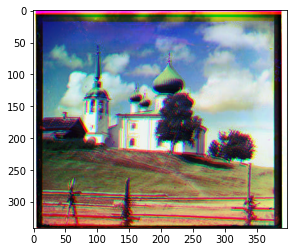

In [27]:
p=path="/content/drive/MyDrive/data/00889v.jpg"
tümislem(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


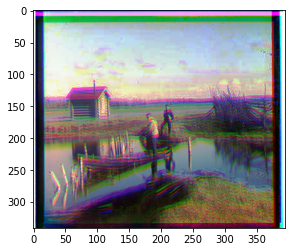

In [26]:
p=path="/content/drive/MyDrive/data/00911v.jpg"
tümislem(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


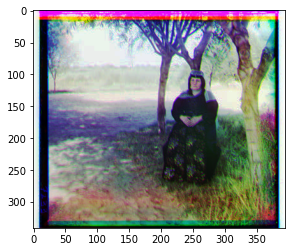

In [19]:
p=path="/content/drive/MyDrive/data/01597v.jpg"
tümislem(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


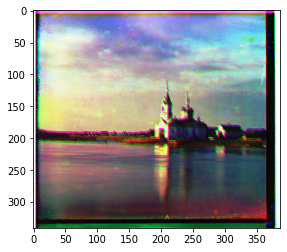

In [25]:
p=path="/content/drive/MyDrive/data/00907v.jpg"
tümislem(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


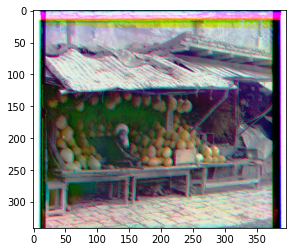

In [21]:
p=path="/content/drive/MyDrive/data/01728v.jpg"
tümislem(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


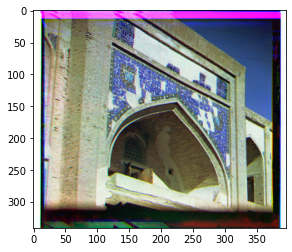

In [22]:
p=path="/content/drive/MyDrive/data/01880v.jpg"
tümislem(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


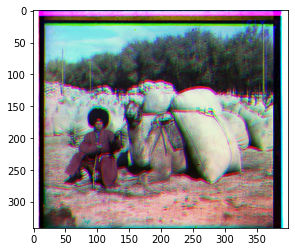

In [23]:
p=path="/content/drive/MyDrive/data/10131v.jpg"
tümislem(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


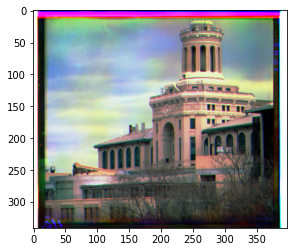

In [24]:
p=path="/content/drive/MyDrive/data/31421v.jpg"
tümislem(p)